In [1]:
root_folder = %pwd

In [2]:
import os

import numpy as np
import obspy

from synthacc.recordings import Seismogram, Accelerogram, Recording, plot_recordings
from synthacc.spectral import plot_fass
from synthacc.response import plot_response_spectra
from robspy.synthacc import API

In [3]:
s = obspy.read(os.path.join(root_folder, 'data', 'kinrooi', 'DR267_MOLA-02351.evt'))

In [4]:
s.detrend('linear')
s.filter('lowpass', freq=50)
#s.filter('bandpass', freqmin=1, freqmax=50)

6 Trace(s) in Stream:
.MOLA..0 | 2018-05-25T22:43:34.000000Z - 2018-05-25T22:43:58.996000Z | 250.0 Hz, 6250 samples
.MOLA..1 | 2018-05-25T22:43:34.000000Z - 2018-05-25T22:43:58.996000Z | 250.0 Hz, 6250 samples
.MOLA..2 | 2018-05-25T22:43:34.000000Z - 2018-05-25T22:43:58.996000Z | 250.0 Hz, 6250 samples
.MOLA..3 | 2018-05-25T22:43:34.000000Z - 2018-05-25T22:43:58.996000Z | 250.0 Hz, 6250 samples
.MOLA..4 | 2018-05-25T22:43:34.000000Z - 2018-05-25T22:43:58.996000Z | 250.0 Hz, 6250 samples
.MOLA..5 | 2018-05-25T22:43:34.000000Z - 2018-05-25T22:43:58.996000Z | 250.0 Hz, 6250 samples

In [5]:
unit = 'm/s2'

mola_e = Seismogram.from_trace(s[0], unit=unit)
mola_n = Seismogram.from_trace(s[1], unit=unit)
mola_z = Seismogram.from_trace(s[2], unit=unit)
molb_e = Seismogram.from_trace(s[3], unit=unit)
molb_n = Seismogram.from_trace(s[4], unit=unit)
molb_z = Seismogram.from_trace(s[5], unit=unit)

mola = Recording({'Z': mola_z,'E': mola_e, 'N': mola_n})
molb = Recording({'Z': molb_z,'E': molb_e, 'N': molb_n})

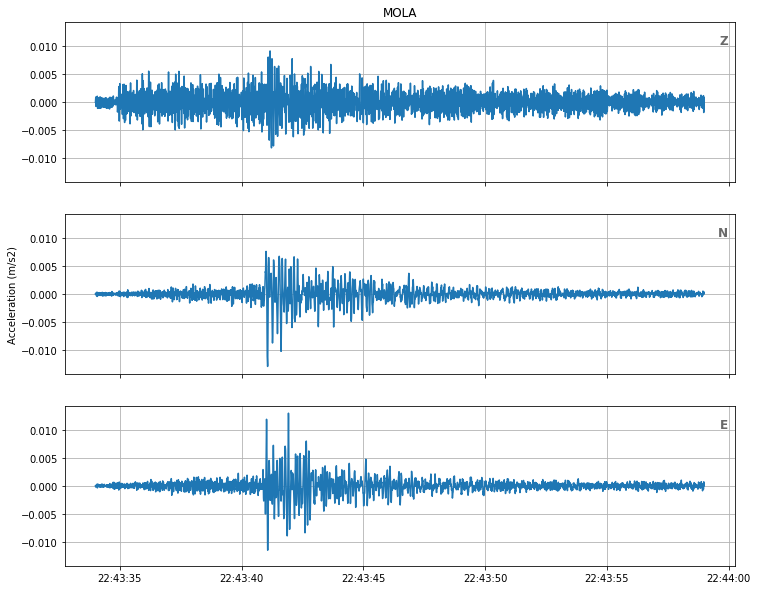

In [6]:
mola.plot(size=(12, 10), title='MOLA')

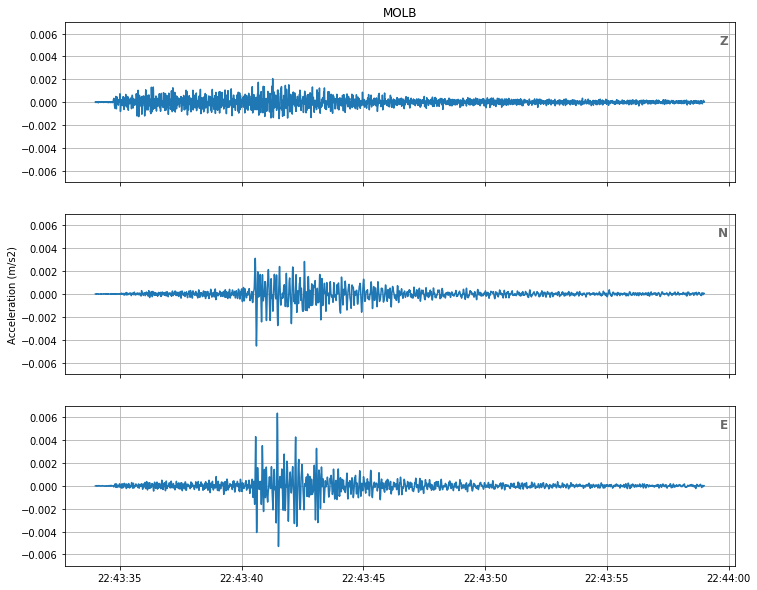

In [7]:
molb.plot(size=(12, 10), title='MOLB')

In [8]:
print(mola.pgm)
print(molb.pgm)

0.013020139621156829
0.006362371336824078


In [9]:
api = API()

In [10]:
s_time = '2018-05-25 22:43:34'
e_time = 25

mols = api.get_recording('MOLS', s_time, e_time).differentiate()
molt = api.get_recording('MOLT', s_time, e_time).differentiate()

C:\Miniconda3\envs\phd_py36\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


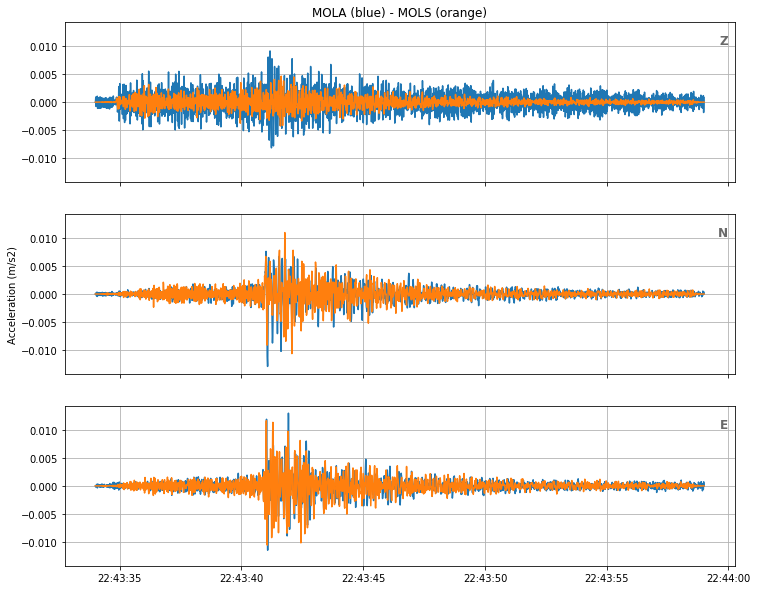

In [11]:
plot_recordings([mola, mols], title='MOLA (blue) - MOLS (orange)', size=(12, 10))

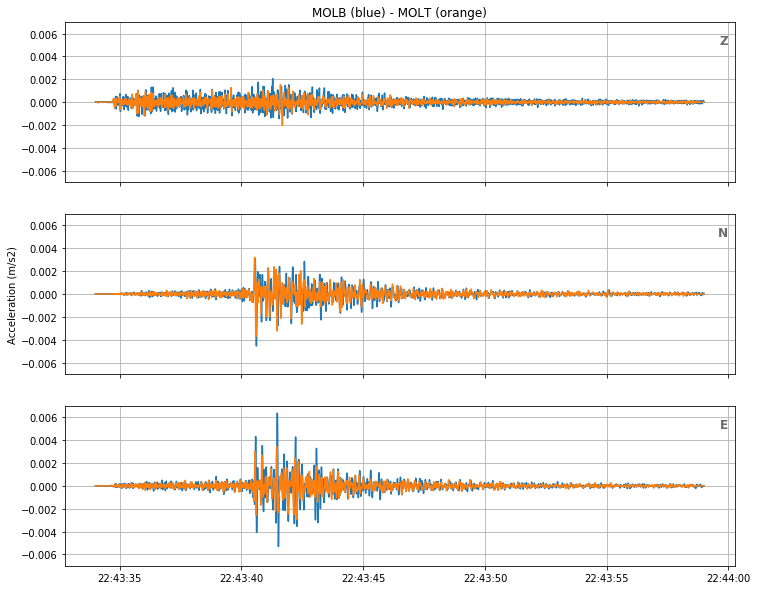

In [12]:
plot_recordings([molb, molt], title='MOLB (blue) - MOLT (orange)', size=(12, 10))

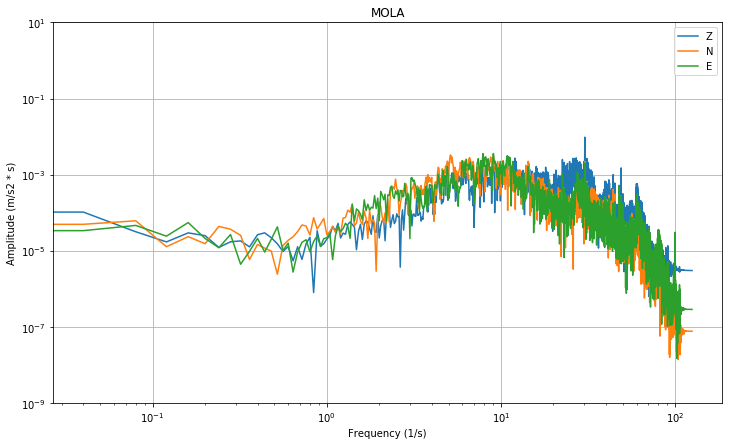

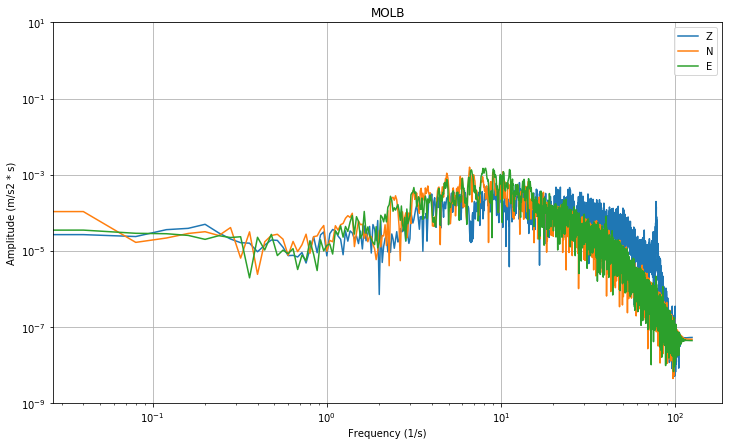

In [13]:
plot_fass(
    [
        mola.get_component('Z').fas,
        mola.get_component('N').fas,
        mola.get_component('E').fas,
    ], labels=['Z', 'N', 'E'], min_amplitude=10**-9, max_amplitude=10, size=(12, 7), title='MOLA')

plot_fass(
    [
        molb.get_component('Z').fas,
        molb.get_component('N').fas,
        molb.get_component('E').fas,
    ], labels=['Z', 'N', 'E'], min_amplitude=10**-9, max_amplitude=10, size=(12, 7), title='MOLB')

0.11768119524349985


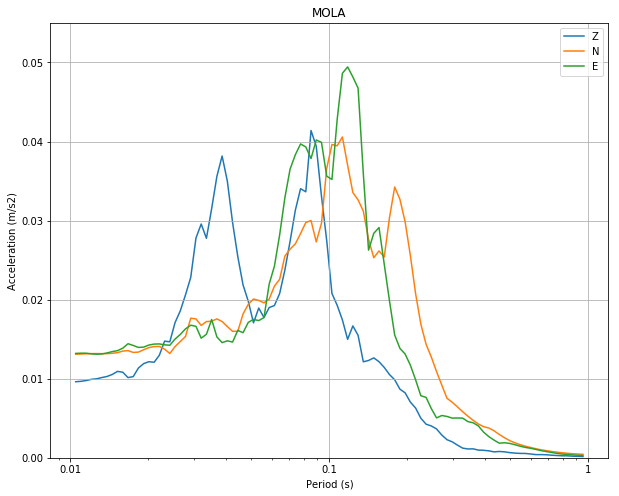

0.12328467394420665


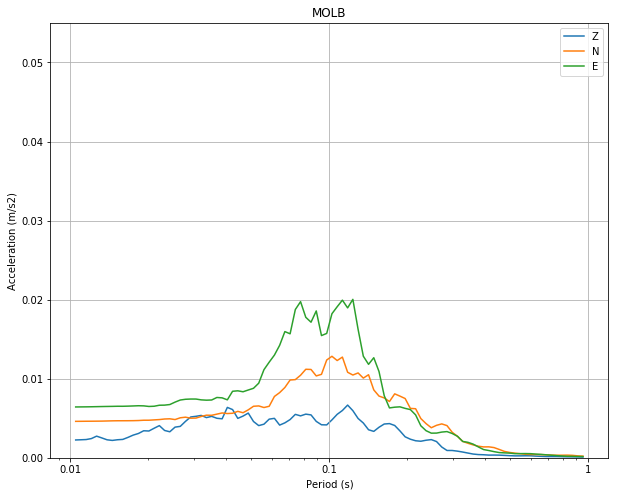

In [14]:
periods = np.logspace(-2, 0, 100)

mola_z_rs = Accelerogram.from_seismogram(mola.get_component('Z')).get_response_spectrum(periods)
mola_n_rs = Accelerogram.from_seismogram(mola.get_component('N')).get_response_spectrum(periods)
mola_e_rs = Accelerogram.from_seismogram(mola.get_component('E')).get_response_spectrum(periods)

print(mola_e_rs.max_response_period)

plot_response_spectra([mola_z_rs, mola_n_rs, mola_e_rs], labels=['Z', 'N', 'E'], max_response=0.05, size=(10, 8), title='MOLA')

molb_z_rs = Accelerogram.from_seismogram(molb.get_component('Z')).get_response_spectrum(periods)
molb_n_rs = Accelerogram.from_seismogram(molb.get_component('N')).get_response_spectrum(periods)
molb_e_rs = Accelerogram.from_seismogram(molb.get_component('E')).get_response_spectrum(periods)

print(molb_e_rs.max_response_period)

plot_response_spectra([molb_z_rs, molb_n_rs, molb_e_rs], labels=['Z', 'N', 'E'], max_response=0.05, size=(10, 8), title='MOLB')